# PROJECT 4 - CHI CITY MOSQUITOS

EDA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [131]:
data  = pd.read_csv("datasets/train.csv")
data_test = pd.read_csv("datasets/test.csv")

### Objective

predict when and where different species of mosquitos will test positive for West Nile virus

In [5]:
data.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

##### train.csv
- Date: date that the WNV test is performed
- Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
- Species: the species of mosquitos
- Block: block number of address
- Street: street name
- Trap: Id of the trap
- AddressNumberAndStreet: approximate address returned from GeoCoder
- Latitude, Longitude: Latitude and Longitude returned from GeoCoder
- AddressAccuracy: accuracy returned from GeoCoder
- NumMosquitos: number of mosquitoes caught in this trap
- WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present

In [132]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data_test['Date'] = data_test['Date'].apply(pd.to_datetime)

In [133]:
data.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [134]:
data_test.dtypes

Id                                 int64
Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
dtype: object

In [135]:
trend = data['WnvPresent'].groupby(data['Date']).mean().to_frame()

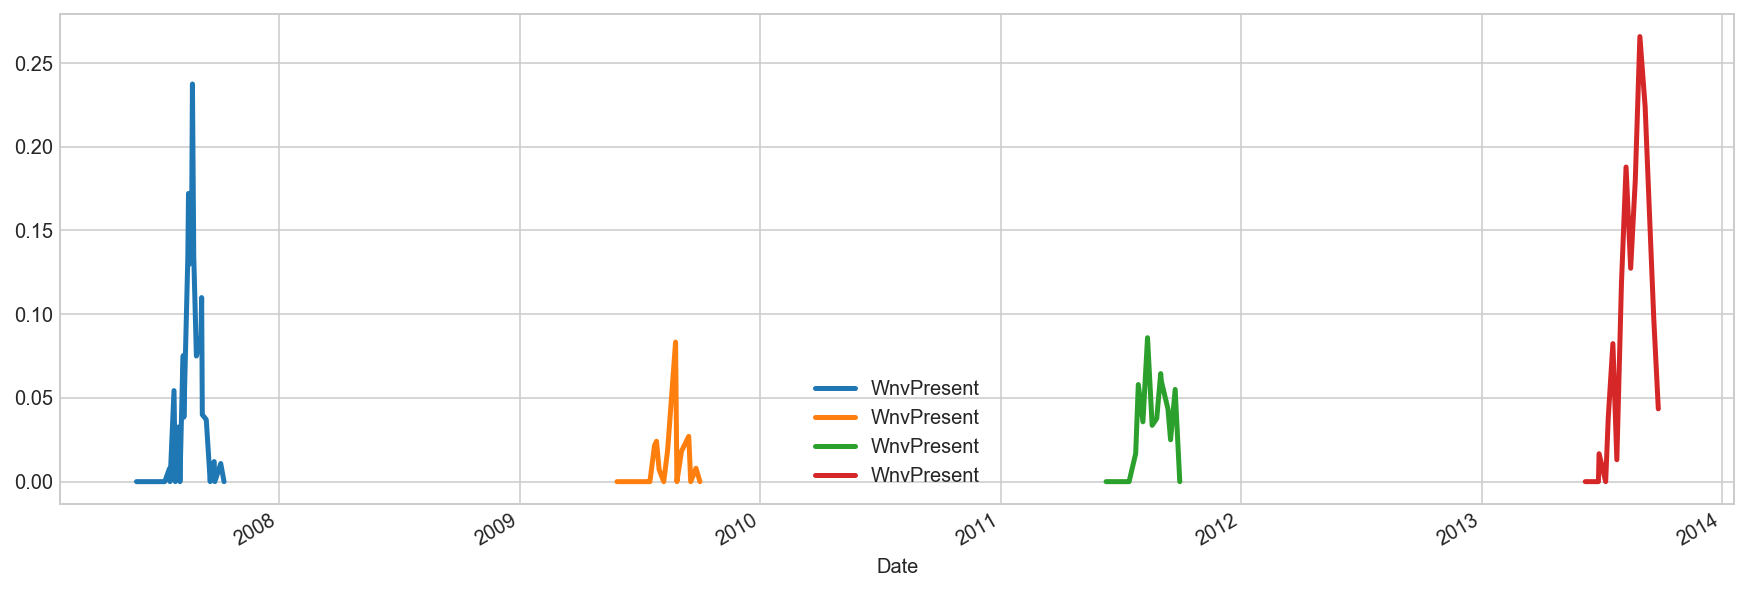

In [136]:
fig, ax = plt.subplots()
trend['2007'].plot(ax=ax, lw=2.5, figsize=(15,5))
trend['2009'].plot(ax=ax,lw=2.5, figsize=(15,5))
trend['2011'].plot(ax=ax,lw=2.5, figsize=(15,5))
trend['2013'].plot(ax=ax, lw=2.5, figsize=(15,5))


In [160]:
data['WnvPresent'].groupby(data['Species']).mean().to_frame()

,WnvPresent
Species,
CULEX ERRATICUS,0.000000
CULEX PIPIENS,0.088922
CULEX PIPIENS/RESTUANS,0.055135
CULEX RESTUANS,0.017883
CULEX SALINARIUS,0.000000
CULEX TARSALIS,0.000000
CULEX TERRITANS,0.000000


## Test data

In [139]:
trend_test = data_test['AddressAccuracy'].groupby(data_test['Date']).mean().to_frame()

In [147]:
trend_test['2014']

,AddressAccuracy
Date,
2014-06-05,7.954023
2014-06-12,7.945306
2014-06-19,7.960356
2014-06-26,7.948233
2014-07-03,7.956876
2014-07-10,7.960260
2014-07-17,7.954918
2014-07-24,7.953086
2014-07-31,7.967068


### Spray 

In [148]:
data_spray = pd.read_csv('datasets/spray.csv')

In [150]:
data_spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [151]:
data_spray['Date'] = data_spray['Date'].apply(pd.to_datetime)

In [157]:
data_spray.groupby('Date').sum()

,Latitude,Longitude
Date,,
2011-08-29,4027.271407,-8368.870185
2011-09-07,88752.789255,-185621.730275
2013-07-17,92040.451875,-193073.864637
2013-07-25,67420.937047,-140970.666583
2013-08-08,50108.102205,-104797.957000
2013-08-15,111858.585642,-234205.500608
2013-08-16,5916.051115,-12377.071155
2013-08-22,66358.901177,-139125.987308
2013-08-29,96362.014075,-201892.851775


### Weather 

In [158]:
data_weather = pd.read_csv('datasets/weather.csv')

In [159]:
data_weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object